**this script builds simplot to detect recombination sites**

In [1]:
from Bio import AlignIO
from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord 
from Bio.Alphabet import generic_dna
from Bio import AlignIO
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def pdistance(seq1, seq2):
    p = 0
    pairs = []
    for x in zip(seq1,seq2):
        if '-' not in x: pairs.append(x)
    for (x,y) in pairs:
        if x != y:
            p += 1
    length = len(pairs)
    return float(1 - p / length)

- put path to alignment in here : 

In [3]:
align = AlignIO.read("for_recan_lsdv_1.fasta", "fasta")

- type in potential recombinant sequence which is under study. it must be an index in the alignment, like in an array, starting from zero

In [4]:
pot_rec = int(input("enter the index of the sequence to analyze")) # potential recombinant's index in the alignment

enter the index of the sequence to analyze2


In [5]:
window_size = int(input("enter the length of the sliding window: "))


enter the length of the sliding window: 500


In [6]:
steps = len(align[0, :]) // window_size
start = 0
distance_data = {}

In [7]:
# creating list of potential parents, which is the indices of the seqs except the recombinant under study
parents = list(range(0, len(align))) 
parents.remove(pot_rec) # here we remove from the index list the index of the recombinant under study by its value, 
                        # which is the index for the alignment

In [8]:
for par in parents:
    dist_container = []
    start = 0
    for step in range(0 , steps):
        finish = start + window_size + 1
        seq1 = align[pot_rec, start:finish].seq # here is potential recombinant sequence slice
        seq2 = align[par, start:finish].seq # here's parent
        dist = pdistance(seq1, seq2)
        dist_container.append(dist)
        start = finish - 1
    distance_data[align[pot_rec].id + "_vs_" + align[par].id] = dist_container
        

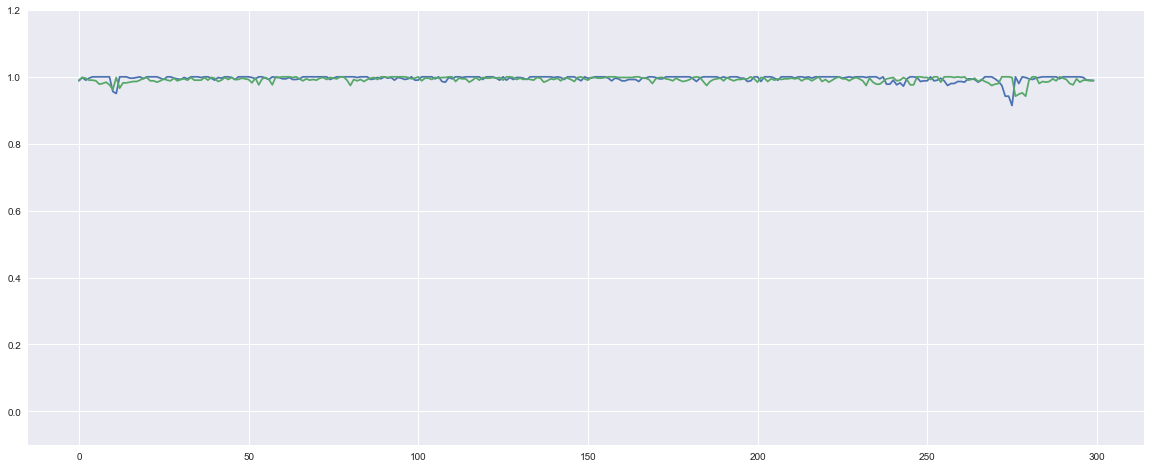

In [9]:
fig = plt.figure(figsize=(20, 8))
for key in distance_data.keys():
    plt.plot(distance_data[key])

plt.ylim(-0.1, 1.2)
plt.show()